In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [86]:
df = pd.read_csv("customers")
data=df.copy()
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [88]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


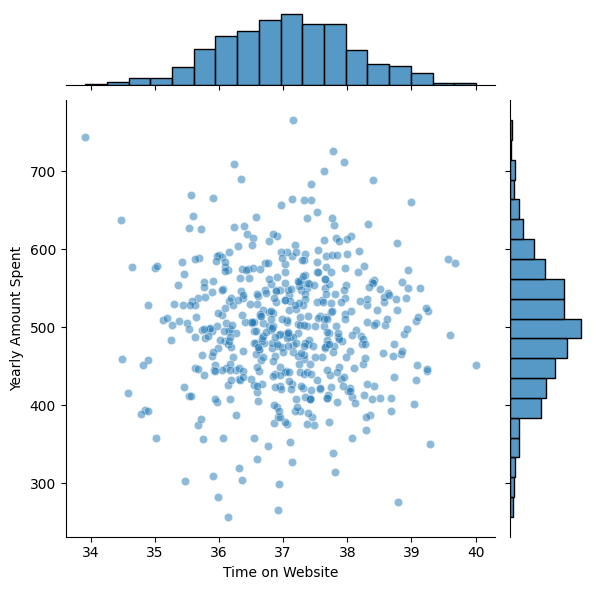

In [89]:
# EDA

sns.jointplot(x="Time on Website",y="Yearly Amount Spent",data=df,alpha=0.5)

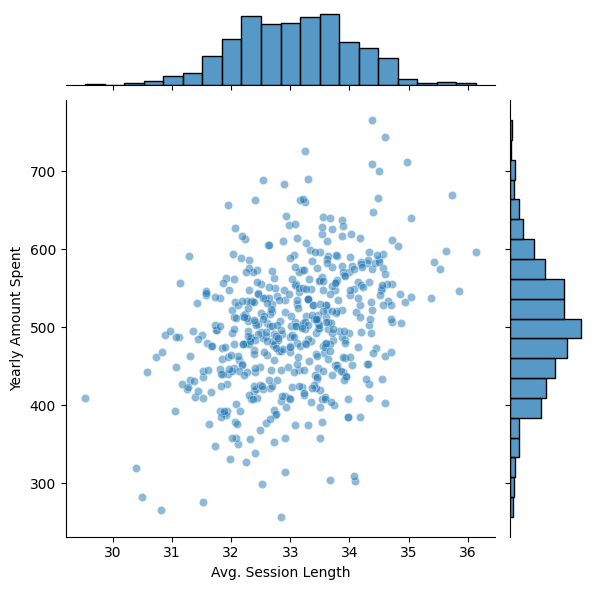

In [90]:
sns.jointplot(x="Avg. Session Length",y="Yearly Amount Spent",data=df,alpha=0.5)

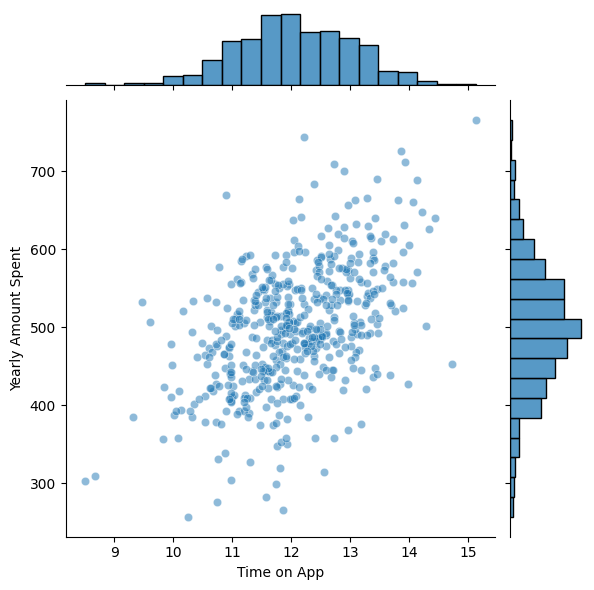

In [91]:
sns.jointplot(x="Time on App",y="Yearly Amount Spent",data=df,alpha=0.5)

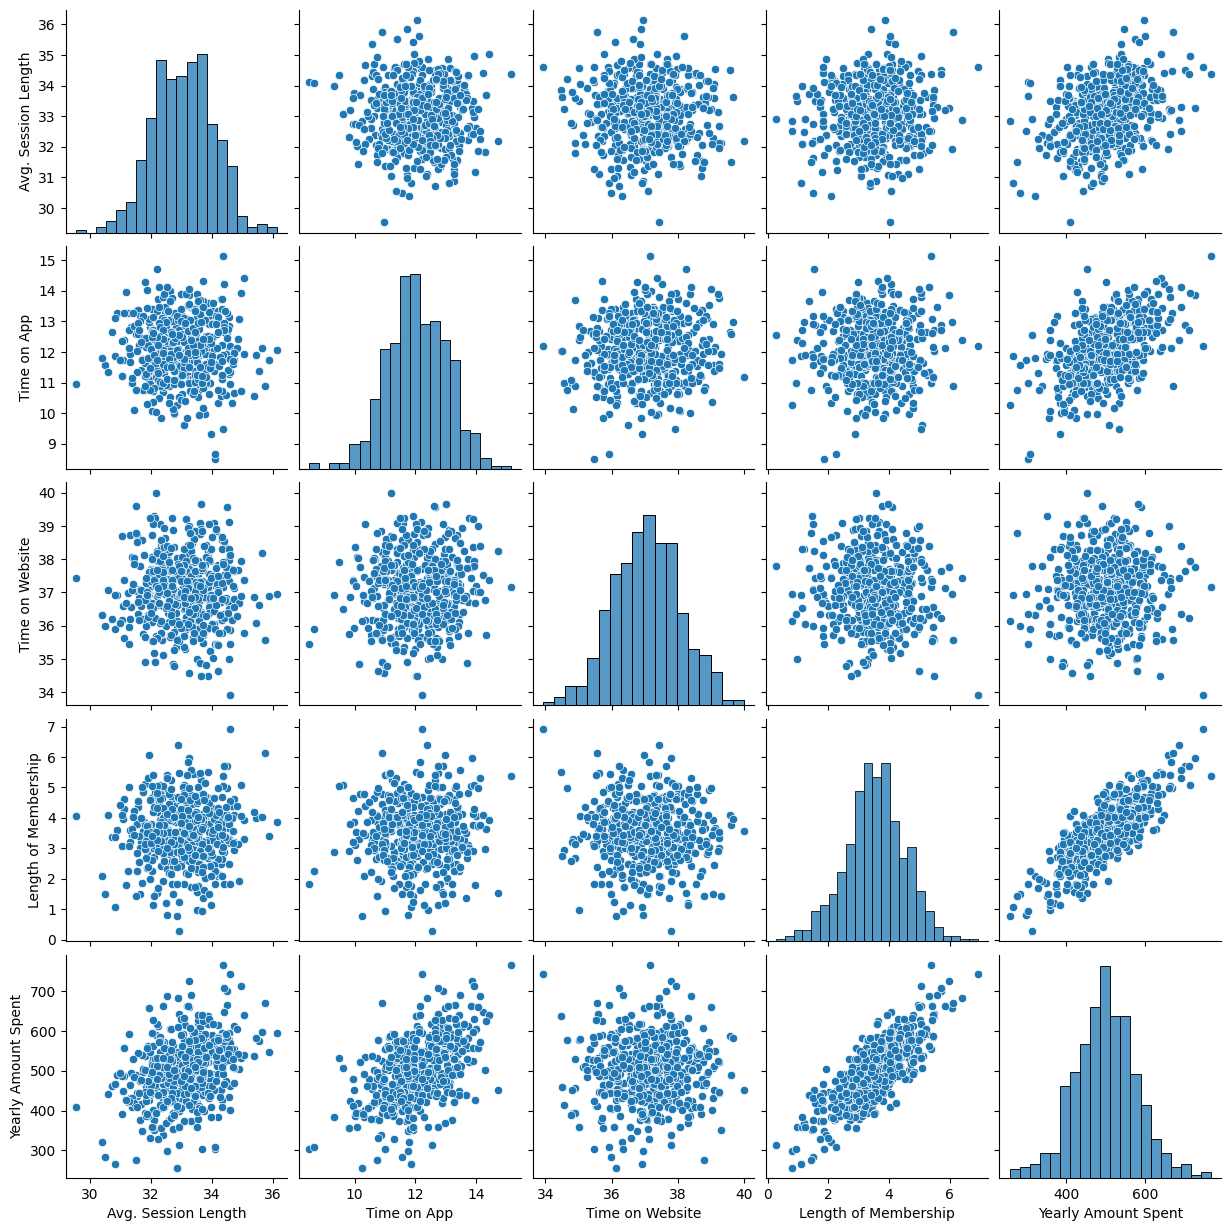

In [92]:
sns.pairplot(df)

<Axes: xlabel='Yearly Amount Spent'>

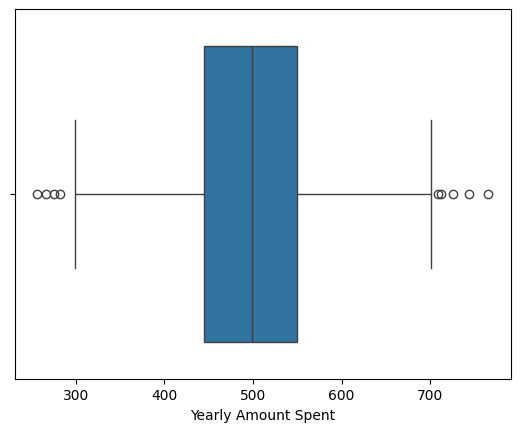

In [93]:
sns.boxplot(x=df['Yearly Amount Spent'])

In [94]:
# prompt: check for mising values in df

df.isnull().sum()


,0
Email,0
Address,0
Avatar,0
Avg. Session Length,0
Time on App,0
Time on Website,0
Length of Membership,0
Yearly Amount Spent,0


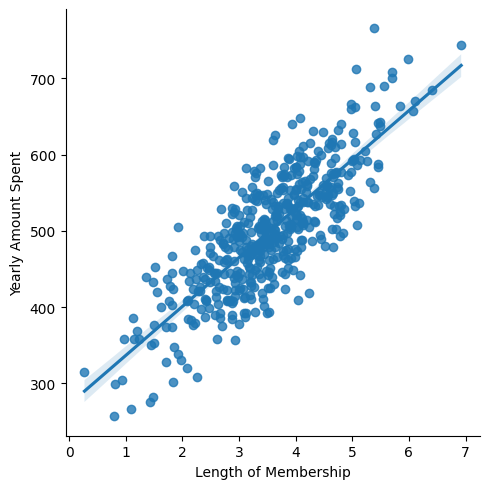

In [95]:
sns.lmplot(x="Length of Membership",y="Yearly Amount Spent",data=df)

In [96]:
# prompt: create Linear regression model to predict Yearly Amount Spent
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]
y = df['Yearly Amount Spent']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)



In [97]:

lm = LinearRegression()
lm.fit(X_train,y_train)


LinearRegression()

In [98]:
lm.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

In [99]:

predictions = lm.predict(X_test)
predictions

array([456.44186104, 402.72005312, 409.2531539 , 591.4310343 ,
       590.01437275, 548.82396607, 577.59737969, 715.44428115,
       473.7893446 , 545.9211364 , 337.8580314 , 500.38506697,
       552.93478041, 409.6038964 , 765.52590754, 545.83973731,
       693.25969124, 507.32416226, 573.10533175, 573.2076631 ,
       397.44989709, 555.0985107 , 458.19868141, 482.66899911,
       559.2655959 , 413.00946082, 532.25727408, 377.65464817,
       535.0209653 , 447.80070905, 595.54339577, 667.14347072,
       511.96042791, 573.30433971, 505.02260887, 565.30254655,
       460.38785393, 449.74727868, 422.87193429, 456.55615271,
       598.10493696, 449.64517443, 615.34948995, 511.88078685,
       504.37568058, 515.95249276, 568.64597718, 551.61444684,
       356.5552241 , 464.9759817 , 481.66007708, 534.2220025 ,
       256.28674001, 505.30810714, 520.01844434, 315.0298707 ,
       501.98080155, 387.03842642, 472.97419543, 432.8704675 ,
       539.79082198, 590.03070739, 752.86997652, 558.27

MAE: 7.228148653430826
MSE: 79.81305165097427
RMSE: 8.933815066978624
         Actual   Predicted  Difference
18   452.315675  456.441861   -4.126186
361  401.033135  402.720053   -1.686918
104  410.069611  409.253154    0.816457
4    599.406092  591.431034    7.975058
156  586.155870  590.014373   -3.858503
..          ...         ...         ...
147  479.731938  478.300766    1.431172
346  488.387526  484.410296    3.977230
423  461.112248  457.590999    3.521249
17   407.704548  411.526576   -3.822028
259  375.398455  375.479006   -0.080551

[150 rows x 3 columns]


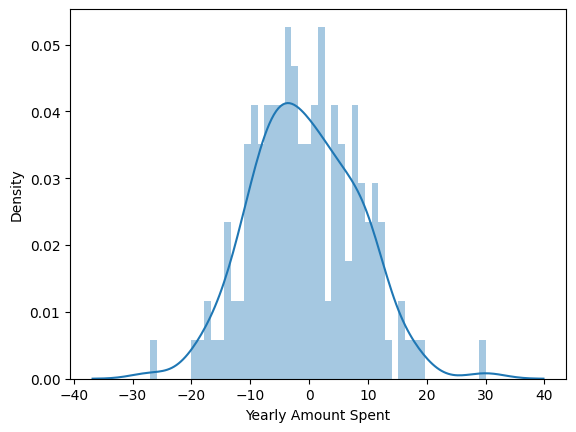

In [100]:

from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

sns.distplot((y_test-predictions),bins=50);

# There seems to be no direct way to find the difference between y_test and X_test as they are of different shapes and represent different things:
# - y_test contains the true values of the target variable we're trying to predict.
# - X_test contains the feature values used to make predictions.

# However, if you want to see how individual predictions differ from true values, you can do this:
diff = pd.DataFrame({'Actual': y_test, 'Predicted': predictions, 'Difference': y_test - predictions})
print(diff)


In [101]:
X2 = df[['Avg. Session Length', 'Time on App', 'Length of Membership']]
y2 = df['Yearly Amount Spent']


X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=101)


In [102]:
model=lm.fit(X_train2,y_train2)

In [103]:
predictions2=model.predict(X_test2)
predictions2

array([456.28733981, 402.30897349, 409.03524731, 591.35170293,
       589.9553423 , 548.7873866 , 577.87432972, 715.31116354,
       474.00967069, 545.81304133, 337.84783048, 500.43031328,
       552.65665898, 409.80520927, 765.56058601, 545.97400429,
       693.42120476, 507.27878853, 573.17451171, 573.25220844,
       397.33850085, 555.29638994, 457.95937114, 482.68602932,
       559.45492494, 412.92569567, 532.28516048, 377.46162375,
       535.1356124 , 447.37640325, 595.55250134, 667.14198837,
       511.99670064, 573.59896075, 504.88888134, 565.03418047,
       460.64650075, 449.88444233, 423.04093347, 456.47898673,
       598.34949951, 449.21698961, 615.12304006, 512.06099945,
       504.49213486, 516.18706503, 569.07723375, 551.50185249,
       356.76943511, 465.18931816, 481.6583896 , 534.18910252,
       256.45748698, 505.28313655, 519.84424885, 315.17847525,
       501.59283029, 386.75961363, 472.75690397, 433.06535393,
       539.64417552, 590.23476299, 753.45192506, 558.34

MAE: 7.236949056091385
MSE: 80.19544609397637
RMSE: 8.955191013818542
         Actual   Predicted  Difference
18   452.315675  456.287340   -3.971664
361  401.033135  402.308973   -1.275838
104  410.069611  409.035247    1.034364
4    599.406092  591.351703    8.054389
156  586.155870  589.955342   -3.799472
..          ...         ...         ...
147  479.731938  478.207390    1.524547
346  488.387526  484.661459    3.726067
423  461.112248  457.632661    3.479587
17   407.704548  411.284999   -3.580452
259  375.398455  375.402658   -0.004203

[150 rows x 3 columns]


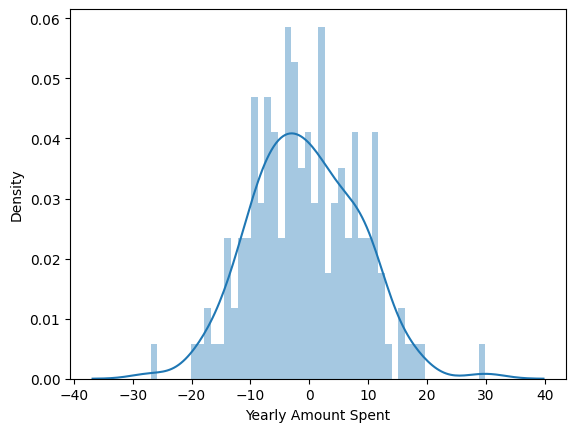

In [104]:
print('MAE:', metrics.mean_absolute_error(y_test2, predictions2))
print('MSE:', metrics.mean_squared_error(y_test2, predictions2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test2, predictions2)))

sns.distplot((y_test2-predictions2),bins=50);

# There seems to be no direct way to find the difference between y_test and X_test as they are of different shapes and represent different things:
# - y_test contains the true values of the target variable we're trying to predict.
# - X_test contains the feature values used to make predictions.

# However, if you want to see how individual predictions differ from true values, you can do this:
diff = pd.DataFrame({'Actual': y_test2, 'Predicted': predictions2, 'Difference': y_test2 - predictions2})
print(diff)

Text(0, 0.5, 'Actual Values')

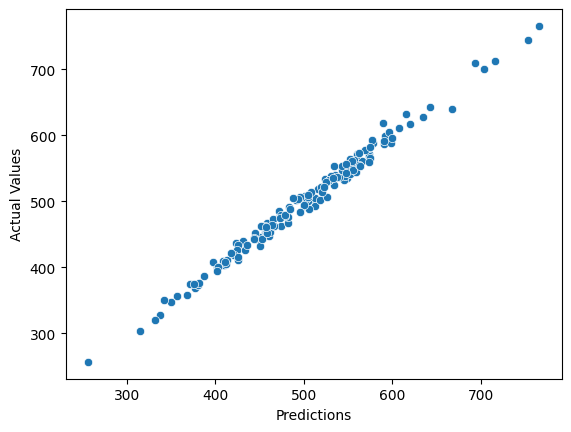

In [105]:
sns.scatterplot(x=predictions2,y=y_test2)
plt.xlabel("Predictions")
plt.ylabel("Actual Values")

In [106]:
# Handling Outliewrs

In [107]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Length of Membership', 'Time on App', 'Avg. Session Length']] = scaler.fit_transform(df[['Length of Membership', 'Time on App', 'Avg. Session Length']])


In [108]:
X = df[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]
y = df['Yearly Amount Spent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


In [109]:
model = LinearRegression()
lm=model.fit(X_train, y_train)

In [110]:
predictions = lm.predict(X_test)
print(predictions)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

[456.44186104 402.72005312 409.2531539  591.4310343  590.01437275
 548.82396607 577.59737969 715.44428115 473.7893446  545.9211364
 337.8580314  500.38506697 552.93478041 409.6038964  765.52590754
 545.83973731 693.25969124 507.32416226 573.10533175 573.2076631
 397.44989709 555.0985107  458.19868141 482.66899911 559.2655959
 413.00946082 532.25727408 377.65464817 535.0209653  447.80070905
 595.54339577 667.14347072 511.96042791 573.30433971 505.02260887
 565.30254655 460.38785393 449.74727868 422.87193429 456.55615271
 598.10493696 449.64517443 615.34948995 511.88078685 504.37568058
 515.95249276 568.64597718 551.61444684 356.5552241  464.9759817
 481.66007708 534.2220025  256.28674001 505.30810714 520.01844434
 315.0298707  501.98080155 387.03842642 472.97419543 432.8704675
 539.79082198 590.03070739 752.86997652 558.27858232 523.71988382
 431.77690078 425.38411902 518.75571466 641.9667215  481.84855126
 549.69830187 380.93738919 555.18178277 403.43054276 472.52458887
 501.82927633 4

In [111]:

df_test = df[df['Yearly Amount Spent'] > 380]
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 471 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 471 non-null    object 
 1   Address               471 non-null    object 
 2   Avatar                471 non-null    object 
 3   Avg. Session Length   471 non-null    float64
 4   Time on App           471 non-null    float64
 5   Time on Website       471 non-null    float64
 6   Length of Membership  471 non-null    float64
 7   Yearly Amount Spent   471 non-null    float64
dtypes: float64(5), object(3)
memory usage: 33.1+ KB


In [112]:
X = df_test[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]
y = df_test['Yearly Amount Spent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


In [113]:
model = LinearRegression()
lm=model.fit(X_train, y_train)
predictions = lm.predict(X_test)
print(predictions)

[549.27867966 424.16821923 473.89722963 387.4682855  397.28257574
 558.02453297 454.51427852 457.84048666 573.96874717 392.93951551
 439.10730046 553.46247454 451.53705646 596.37075169 510.69662021
 478.85777046 485.98902202 652.54455894 429.10126087 496.5406602
 577.64138925 584.44008397 547.80454651 559.01082718 500.02754458
 456.05111981 528.11358422 449.14097204 475.3456187  673.24399801
 531.63828454 547.57493869 563.12676724 479.21156117 538.48890397
 558.71873799 480.96586043 493.52199758 401.18432578 430.63348628
 619.60671183 427.06838506 515.63349473 684.93446514 423.47779229
 504.70618627 406.76141175 623.77516268 576.50968497 458.58594469
 546.28715862 587.73868361 435.3207162  598.38663003 462.62675683
 563.6602657  418.44286931 703.7998674  468.7144029  559.5956963
 515.10035415 607.15467047 543.25340342 610.22617469 545.61611917
 407.69131764 422.06383146 545.75423462 558.59788321 497.89326904
 445.60260424 500.07353798 437.27434797 465.8614049  542.22395485
 507.5993054

In [114]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 8.268425645207106
MSE: 104.20612824571688
RMSE: 10.20814029320311


In [115]:
# Since the error values increased it means removing rows is not a solution for the Error Values

In [116]:
#  Lets tryu cross Fold validations
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [117]:
X=data[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]
y=data['Yearly Amount Spent']

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


In [119]:
linear_model=LinearRegression()
# Cross-validation setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)
# Standardizing the features and applying linear regression
pipeline = make_pipeline(StandardScaler(), linear_model)
# Perform cross-validation
scores = cross_val_score(pipeline, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')

# Print the cross-validation scores
print("Cross-validation scores:", scores)
print("Mean score:", np.mean(scores))
print("Standard deviation of scores:", np.std(scores))

Cross-validation scores: [-103.25776882 -124.95279852 -105.04319651 -101.93185563 -114.21082084]
Mean score: -109.87928806588957
Standard deviation of scores: 8.676022987454541


In [120]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
# Ridge Regression Model
ridge_model = Ridge()

# Define parameter grid
param_grid = {
    'ridge__alpha': [0.1, 1, 10, 100]  # You can adjust these values
}

# Create a pipeline with Ridge Regression
pipeline = make_pipeline(StandardScaler(), ridge_model)

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(pipeline, param_grid, cv=kf, scoring='neg_mean_squared_error')
model_trained=grid_search.fit(X, y)

# Best parameters and best score
print("Best parameters:", model_trained.best_params_)
print("Best score (negative MSE):", model_trained.best_score_)

Best parameters: {'ridge__alpha': 0.1}
Best score (negative MSE): -100.09065590185632


In [121]:
predictions = model_trained.predict(X_test)
print(predictions)

[456.45283378 403.01834487 409.5562703  591.60495667 590.54152268
 548.76584846 577.64527712 715.61108344 472.66372443 546.2839794
 337.25529196 499.83462076 553.48827303 408.66546515 765.8703224
 545.82094233 693.20015879 507.31553038 572.90244948 573.47818036
 398.23304118 554.50757802 457.60070574 482.58383254 559.18755305
 412.40250646 532.099215   377.31561977 534.87694056 448.25152377
 595.83551863 666.8811408  511.31026277 572.51261904 504.98989797
 565.47832375 459.56382863 449.30136821 421.93203236 456.61286689
 597.84473047 450.17389236 615.89731154 511.652544   503.43511155
 515.66279569 567.81602501 551.76002295 355.77604606 464.75480472
 481.41907858 533.97896    254.91190225 505.19903216 519.95559606
 313.62075503 502.55620681 386.86801311 473.22269869 431.98262115
 540.08517579 589.60050409 752.4752724  558.74429872 523.85571518
 431.79312184 424.92212097 518.58846817 642.05550294 481.55193527
 549.02816683 380.19810639 555.72606187 402.45348503 472.34853696
 501.7947314

In [122]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 7.164790262376995
MSE: 78.33350715481139
RMSE: 8.850621851305782


         Actual   Predicted  Difference
18   452.315675  456.452834   -4.137158
361  401.033135  403.018345   -1.985210
104  410.069611  409.556270    0.513341
4    599.406092  591.604957    7.801135
156  586.155870  590.541523   -4.385653
..          ...         ...         ...
147  479.731938  478.458079    1.273859
346  488.387526  483.894704    4.492821
423  461.112248  457.170606    3.941642
17   407.704548  411.491906   -3.787358
259  375.398455  375.201440    0.197015

[150 rows x 3 columns]


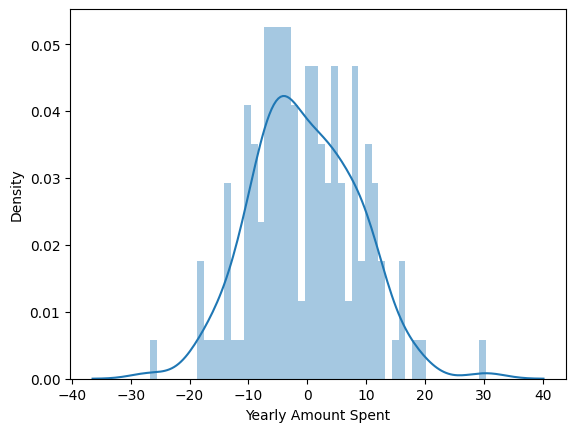

In [123]:
sns.distplot((y_test-predictions),bins=50);

# There seems to be no direct way to find the difference between y_test and X_test as they are of different shapes and represent different things:
# - y_test contains the true values of the target variable we're trying to predict.
# - X_test contains the feature values used to make predictions.

# However, if you want to see how individual predictions differ from true values, you can do this:
diff = pd.DataFrame({'Actual': y_test, 'Predicted': predictions, 'Difference': y_test - predictions})
print(diff)